## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the acute nephritis dataset loaded below and analyze the model generated for this datasett.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# columns: 
# Temperature of patient { 35C-42C }
# Occurrence of nausea { yes, no }
# Lumbar pain { yes, no }
# Urine pushing (continuous need for urination) { yes, no }
# Micturition pains { yes, no }
# Burning of urethra, itch, swelling of urethra outlet { yes, no }
# decision: Nephritis of renal pelvis origin { yes, no } 

cols = ['temp', 'nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning', 'nephritis']
nephritis = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/acute.csv', names=cols)

In [0]:
nephritis.head()

,temp,nausea,lumbar_pain,urine_pushing,micturition_pains,burning,nephritis
35,5,no,yes,no,no,no,no
35,9,no,no,yes,yes,yes,no
35,9,no,yes,no,no,no,no
36,0,no,no,yes,yes,yes,no
36,0,no,yes,no,no,no,no


First, check for missing data and remove all rows containing missing data

In [0]:
# answer below:
for x in nephritis:
  print(x , np.unique(nephritis[x]))

temp [0 1 2 3 4 5 6 7 8 9]
nausea ['no' 'yes']
lumbar_pain ['no' 'yes']
urine_pushing ['no' 'yes']
micturition_pains ['no' 'yes']
burning ['no' 'yes']
nephritis ['no' 'yes']


To use the data, we must convert all columns to numeric. Do this using the `get_dummies` function for all non-numeric columns.

Note: remember to drop the first value.

In [0]:
# answer below:
nephritis.columns
dfdum = pd.DataFrame()
dummies = ['nausea', 'lumbar_pain', 'urine_pushing', 'micturition_pains','burning']
for x in dummies:
  dfdum = pd.concat([dfdum,  pd.get_dummies(nephritis[x], prefix = x, drop_first = True)], axis = 1)

nephritis['nephritis']= np.where(nephritis['nephritis'] == 'yes', 1, 0)
dfn = pd.concat([dfdum, nephritis['nephritis']], axis = 1)
dfn



,nausea_yes,lumbar_pain_yes,urine_pushing_yes,micturition_pains_yes,burning_yes,nephritis
35,0,1,0,0,0,0
35,0,0,1,1,1,0
35,0,1,0,0,0,0
36,0,0,1,1,1,0
36,0,1,0,0,0,0
...,...,...,...,...,...,...
41,0,1,1,0,1,1
41,0,0,0,0,0,0
41,1,1,0,1,0,1
41,0,1,1,0,1,1


Split the data into train and test. Use 20% of the data for our test subset. Use nephritis as the target variable.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split
X=dfn.drop(['nephritis'] , axis = 1)
y=dfn['nephritis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [0]:
X_train.shape

(96, 5)

Generate a KNN model with k=5 for the dataset.  What is the accuracy score for the train and test subsamples?

In [0]:
# answer below:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
neighbors = KNeighborsClassifier(n_neighbors=5)


neighbors.fit(X_train,y_train)

y_train_predict = neighbors.predict(X_train)
cmtrain = confusion_matrix(y_train, y_train_predict)

y_test_predict = neighbors.predict(X_test)
cmtest = confusion_matrix(y_test, y_test_predict)
print(cmtrain)
print(cmtest)
print(neighbors.score(X_train, y_train))
len(y_train)
len(y_test)

[[56  0]
 [ 0 40]]
[[14  0]
 [ 0 10]]
1.0


24

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [0]:
# answer below:
#No it has perfect prediction capability


Let's optimize k. Produce a plot with training and testing accuracy for a wide range of k.

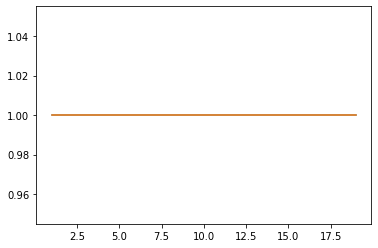

In [0]:
# answer below:
train_accuracy_values = []
test_accuracy_values = []
k_values = []
for i in np.arange(1,21, 2):
  neighbors = KNeighborsClassifier(n_neighbors=i)
  neighbors.fit(X_train,y_train)
  trainscore = neighbors.score(X_train, y_train)
  train_accuracy_values.append(trainscore)
  
  testscore = neighbors.score(X_test, y_test)
  test_accuracy_values.append(testscore)
  k_values.append(i)

plt.plot(k_values, train_accuracy_values)
plt.plot(k_values, test_accuracy_values)

plt.show()